In [1]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
overall = {}

for folder in os.listdir("single_point_overall/"):
    overall[folder] = []
    for filename in os.listdir("single_point_overall/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("single_point_overall/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

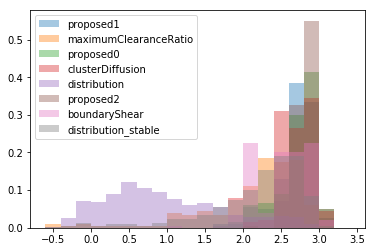

In [10]:
plt.figure()
for key in overall.keys():
    weights = np.ones_like(overall[key])/float(len(overall[key]))
    plt.hist(overall[key], weights=weights, bins=np.arange(-0.6, 3.5, 0.2), alpha=0.4, label=key)
    plt.legend(loc='upper left')

In [11]:
optimal = {}
for filename in os.listdir("single_point_overall/distribution"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("single_point_overall/distribution/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["optimal"] = optimal_final

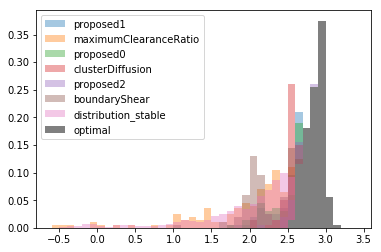

In [13]:
plt.figure()
for key in overall.keys():
    if key != "distribution" and key != "optimal":
        weights = np.ones_like(overall[key])/float(len(overall[key]))
        plt.hist(overall[key], weights=weights, bins=np.arange(-0.6, 3.5, 0.1), alpha=0.4, label=key)
        plt.legend(loc='upper left')
    if key == "optimal":
        weights = np.ones_like(overall[key])/float(len(overall[key]))
        plt.hist(overall[key], weights=weights, bins=np.arange(-0.6, 3.5, 0.1), alpha=1, label=key)
        plt.legend(loc='upper left')

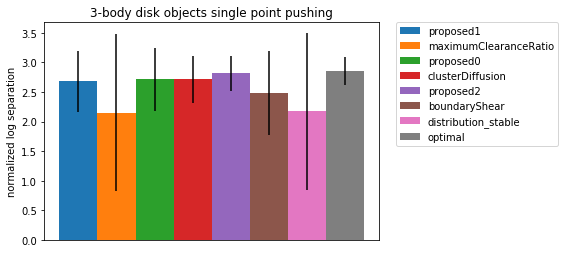

In [34]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [2*np.std(overall[p])], \
                          [2*np.std(overall[p])]]

width = 0.1
fig, ax = plt.subplots()
i = 0
for p in policy_lst:
    if p != "distribution":
        rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
        i+=1
ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("3-body disk objects"))
ax.set_title('3-body disk objects single point pushing')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)